# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(10)



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
df.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В датасете есть пропуски, некорректное название столбцов, в столбце время выставления объявление - строка, надо будет переделать в datetime

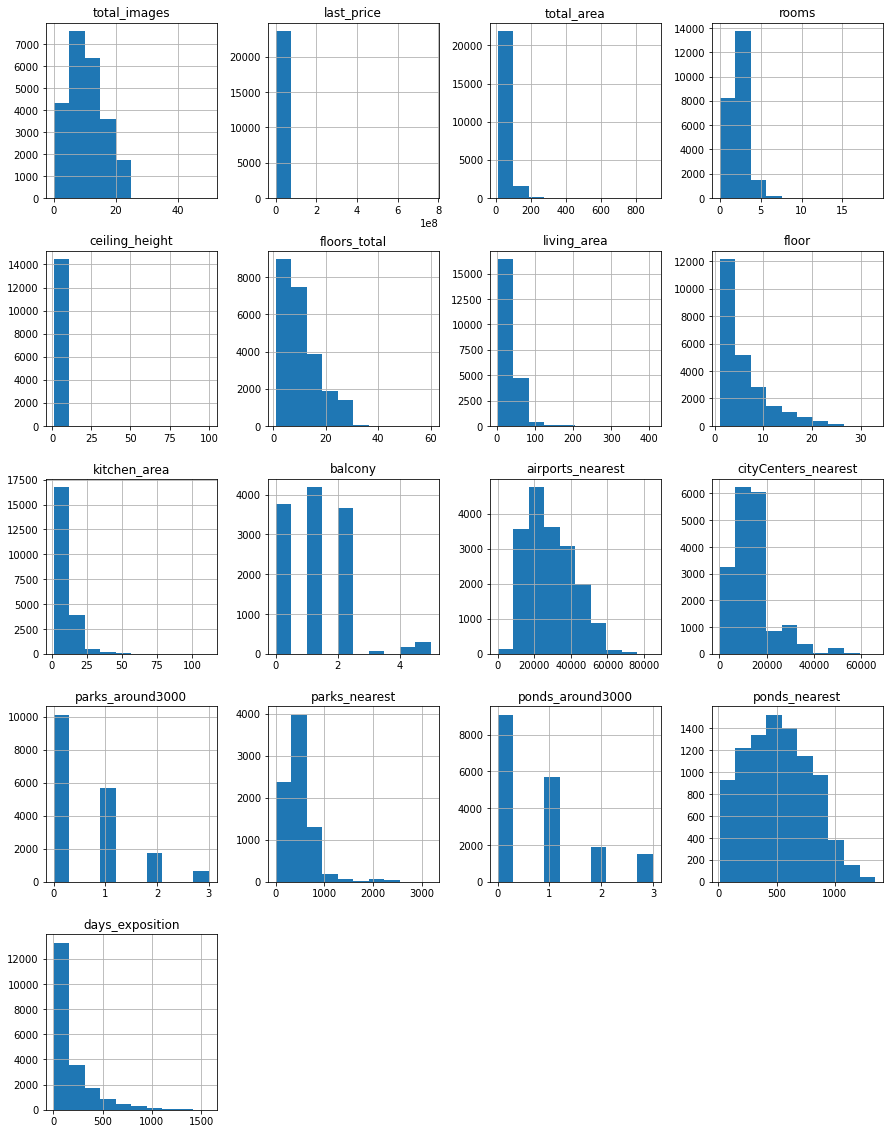

''

In [4]:
df.hist(figsize=(15, 20))
plt.show()
;

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Предобработка данных

In [6]:
df.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

In [7]:
df.isna().sum().sort_values()/df.shape[0]*100

total_images             0.000000
open_plan                0.000000
floor                    0.000000
rooms                    0.000000
studio                   0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around3000        23.283683
parks_around3000        23.283683
cityCenters_nearest     23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64

Проверяем на наличие пропусков в датасете, как видим их очень много, особенно в столбце "аппартаменты", с него и начнем. Взглянув на результат, мы видим, что мы можем заполнить пропуски только  некоторых столбцах, таких как наличие балконов, является ли аппартаментами помещение или нет. Для всех остальных пропусков у нас недостаток данных: мы никак не узнаем где расположена квартира, какая площадь кухни или жилая площадь, но в этом задача и не стоит.

In [8]:
colum= [
 'total_images',  
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',  
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_distance',
 'city_centers_distance',
 'parks_around_3km',
 'parks_distance',
 'ponds_around_3km',
 'ponds_distance',
 'days_exposition'
]
df.set_axis(colum, axis='columns', inplace=True)

Переименовывем столбцы на более понятные

In [9]:
df = df[[
    'locality_name',
    'rooms',
    'last_price',
    'total_area',
    'living_area',
    'floor',
    'floors_total',
    'kitchen_area',
    'ceiling_height',
    'balcony',
    'is_apartment',
    'studio',
    'open_plan',
    'city_centers_distance',
    'airports_distance',
    'parks_around_3km',
    'parks_distance',
    'ponds_around_3km',
    'ponds_distance',
    'first_day_exposition',
    'days_exposition',
    'total_images'
]]



<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Хороший ход действий

Меняем столбцы местами для удобства восприятия

In [10]:
df.head()

,locality_name,rooms,last_price,total_area,living_area,floor,floors_total,kitchen_area,ceiling_height,balcony,...,open_plan,city_centers_distance,airports_distance,parks_around_3km,parks_distance,ponds_around_3km,ponds_distance,first_day_exposition,days_exposition,total_images
0,Санкт-Петербург,3,13000000.0,108.0,51.0,8,16.0,25.0,2.70,NaN,...,False,16028.0,18863.0,1.0,482.0,2.0,755.0,2019-03-07T00:00:00,NaN,20
1,посёлок Шушары,1,3350000.0,40.4,18.6,1,11.0,11.0,NaN,2.0,...,False,18603.0,12817.0,0.0,NaN,0.0,NaN,2018-12-04T00:00:00,81.0,7
2,Санкт-Петербург,2,5196000.0,56.0,34.3,4,5.0,8.3,NaN,0.0,...,False,13933.0,21741.0,1.0,90.0,2.0,574.0,2015-08-20T00:00:00,558.0,10
3,Санкт-Петербург,3,64900000.0,159.0,NaN,9,14.0,NaN,NaN,0.0,...,False,6800.0,28098.0,2.0,84.0,3.0,234.0,2015-07-24T00:00:00,424.0,0
4,Санкт-Петербург,2,10000000.0,100.0,32.0,13,14.0,41.0,3.03,NaN,...,False,8098.0,31856.0,2.0,112.0,1.0,48.0,2018-06-19T00:00:00,121.0,2


Выводим таблицу на экран, чтобы убедиться, что столбцы переместились

In [11]:
df.duplicated().sum()

0

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Проверка на дубликаты - основа предобработки данных

Проверяем на наличие дубликатов, как видим они тут отсутствуют, но это не точно)

In [12]:
df['is_apartment'] = df['is_apartment'].fillna(False)


В данной строке заполняем пропуски в столбце "является ли аппартаментами", множество пропусков связано с тем, что люди не ставят галочки в этом пункте

In [13]:
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

проверяем, что пропусков не осталось

In [14]:
df['balcony'] = df['balcony'].fillna(0)


заполняем пропуски в столбце балконы, пропуск примем за отсутсвие балкнов, т.е. кол-во балконов 0.

In [15]:
df['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

In [16]:
df['balcony']=df['balcony'].astype(int)

проверяем из каких значений состоит столбец балконы и убеждаемся, что пропусков не осталось

In [17]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Выводим уникальные значения по городам и видим, что есть названия через "ё" и через "е", избавимся от них


In [18]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)

In [19]:
df['locality_name'].isna().sum()

49

In [20]:
df=df.dropna(subset=['locality_name'])

Удаляем строки в которых есть пропуски по названию города или населенного пункта, в дальнейшем они бесполезны для анализа

In [21]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

Проверим, поменялась ли буква "ё" на "е" в названии населенных пунктов

In [22]:
df['locality_name'].isna().sum()

0

In [23]:
df['locality_name']= df['locality_name'].str.lower()

In [24]:
df['locality_name'].value_counts()

санкт-петербург                    15721
поселок мурино                       556
поселок шушары                       440
всеволожск                           398
пушкин                               369
                                   ...  
деревня иссад                          1
поселок платформа 69-й километр        1
поселок левашово                       1
деревня шпаньково                      1
деревня раздолье                       1
Name: locality_name, Length: 330, dtype: int64

In [25]:
df=df.dropna(subset=['floors_total'])

Удаляем пропуски в столбце количество этажей, т.к. мы точно не можем приравнять к среднему или медианному значению, типы домов могут отличаться

In [26]:
df['floors_total'].isna().sum()

0

In [27]:
df['floors_total'].where(df['floors_total']>5).value_counts().sort_values(ascending=False)

9.0     3758
16.0    1375
12.0    1361
10.0    1174
25.0    1075
6.0      910
17.0     833
7.0      589
14.0     553
18.0     505
24.0     462
8.0      388
15.0     365
23.0     349
19.0     339
22.0     286
20.0     271
13.0     229
11.0     202
27.0     164
21.0     158
26.0     124
35.0      24
28.0      21
36.0       3
34.0       1
37.0       1
60.0       1
29.0       1
52.0       1
33.0       1
Name: floors_total, dtype: int64

Вывод гистограмм в самом начале подтверидился, чаще всего в объявлениях о продаже встречаются квартиры в 9-этажных домах, неудивительно( эхо СССР) ;)

In [28]:
df['total_area'].isna().sum()

0

In [29]:
living_ratio = df['living_area'].median() / df['total_area'].median()
kitchen_ratio = df['kitchen_area'].median() / df['total_area'].median()
df['living_area'].fillna(living_ratio * df['total_area'], inplace=True)
df['kitchen_area'].fillna(kitchen_ratio * df['total_area'], inplace=True)

In [30]:
df['living_area'].isna().sum()

0

Заполняем пропуски в столбце жилая площадь в зависимости от общей площади квартиры

In [31]:
df['kitchen_area'].isna().sum()

0

Заполнили пропуски в площади кухни в зависимости от жилой площади

In [32]:
df['parks_around_3km'] = df['parks_around_3km'].fillna(0)
df['ponds_around_3km'] = df['ponds_around_3km'].fillna(0)

Заполняем пропуски в столбцах парки и водоемы рядом по тем же причинам, что и пропуски в наличии балконов

In [33]:
for t in df['rooms'].unique():
    df.loc[(df['rooms']==t) & (df['ceiling_height'].isna()), 'ceiling_height'] = \
    df.loc[df['rooms']==t]['ceiling_height'].mean()

In [34]:
df['ceiling_height'].isna().sum()

1

In [35]:
df = df.query('2 < ceiling_height <5')

In [36]:
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S'
)

Переводим значение даты их строки в datetime

In [37]:
df['last_price'] = df['last_price'].astype(int)
df['floors_total'] = df['floors_total'].astype(int)

Меняем значений в стоимости и количество этажей на целочисленные

In [38]:
df['city_centers_distance'] = df['city_centers_distance'] / 1000
df['airports_distance'] = df['airports_distance'] / 1000
df['parks_distance'] = df['parks_distance'] / 1000
df['ponds_distance'] = df['ponds_distance'] / 1000

In [39]:
df.head()

,locality_name,rooms,last_price,total_area,living_area,floor,floors_total,kitchen_area,ceiling_height,balcony,...,open_plan,city_centers_distance,airports_distance,parks_around_3km,parks_distance,ponds_around_3km,ponds_distance,first_day_exposition,days_exposition,total_images
0,санкт-петербург,3,13000000,108.0,51.000000,8,16,25.000,2.700000,0,...,False,16.028,18.863,1.0,0.482,2.0,0.755,2019-03-07,NaN,20
1,поселок шушары,1,3350000,40.4,18.600000,1,11,11.000,2.716241,2,...,False,18.603,12.817,0.0,NaN,0.0,NaN,2018-12-04,81.0,7
2,санкт-петербург,2,5196000,56.0,34.300000,4,5,8.300,2.756371,0,...,False,13.933,21.741,1.0,0.090,2.0,0.574,2015-08-20,558.0,10
3,санкт-петербург,3,64900000,159.0,91.730769,9,14,27.825,2.773854,0,...,False,6.800,28.098,2.0,0.084,3.0,0.234,2015-07-24,424.0,0
4,санкт-петербург,2,10000000,100.0,32.000000,13,14,41.000,3.030000,0,...,False,8.098,31.856,2.0,0.112,1.0,0.048,2018-06-19,121.0,2


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23513 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   locality_name          23513 non-null  object        
 1   rooms                  23513 non-null  int64         
 2   last_price             23513 non-null  int64         
 3   total_area             23513 non-null  float64       
 4   living_area            23513 non-null  float64       
 5   floor                  23513 non-null  int64         
 6   floors_total           23513 non-null  int64         
 7   kitchen_area           23513 non-null  float64       
 8   ceiling_height         23513 non-null  float64       
 9   balcony                23513 non-null  int64         
 10  is_apartment           23513 non-null  bool          
 11  studio                 23513 non-null  bool          
 12  open_plan              23513 non-null  bool          
 13  c

<div class="alert alert-info">
    <b></b> 
    В данной части убрали пропуски где это возможно, привели тип данных к необходимому. Сделали срез по потолкам, чтобы не было аномальных значений (потолки высотой с многоэтажку), переместили столбцы для удобства восприятия и переименовали их в соответствии с правилом написания змеиного регистра.
</div>

### Посчитайте и добавьте в таблицу новые столбцы

In [41]:
df['price_kv_m'] = df['last_price']/df['total_area'] #считаем цену 1 кв.м

In [42]:
df['weekday'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year # добавлям столбцы день недели, месяц и год

In [43]:
def floor_categorize(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

    
    

In [44]:
df['floor_category'] = df.apply(floor_categorize, axis=1) # создаем функцию по категории этажа и добавляем новый столбец

In [45]:
df.sample(5)

,locality_name,rooms,last_price,total_area,living_area,floor,floors_total,kitchen_area,ceiling_height,balcony,...,ponds_around_3km,ponds_distance,first_day_exposition,days_exposition,total_images,price_kv_m,weekday,month,year,floor_category
23255,санкт-петербург,1,5330000,43.0,17.0,10,13,11.0,2.716241,0,...,2.0,0.440,2017-02-06,161.0,7,123953.488372,0,2,2017,другой
10503,санкт-петербург,1,3250000,32.0,18.0,2,5,6.0,2.500000,2,...,1.0,0.526,2017-09-26,119.0,0,101562.500000,1,9,2017,другой
9342,тосно,2,2250000,45.0,25.4,1,5,6.2,2.756371,0,...,0.0,NaN,2017-06-05,83.0,11,50000.000000,0,6,2017,первый
1866,никольское,1,1900000,33.5,17.5,5,5,8.3,2.600000,0,...,0.0,NaN,2017-12-20,318.0,9,56716.417910,2,12,2017,последний
7105,санкт-петербург,2,3500000,53.0,31.0,2,3,8.0,2.756371,1,...,1.0,0.467,2017-11-18,75.0,0,66037.735849,5,11,2017,другой


In [46]:
df['city_centers_distance'] = df['city_centers_distance'].round(decimals=0)

In [47]:
len(df['city_centers_distance'])

23513

### Проведите исследовательский анализ данных

In [48]:
df[[
    'total_area', 
    'living_area', 
    'kitchen_area', 
    'last_price', 
    'rooms',
    'ceiling_height',
    'floor',
    'floor_category',
    'floors_total',
    'city_centers_distance',
    'airports_distance',
    'parks_distance',
    'first_day_exposition'
]].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,city_centers_distance,airports_distance,parks_distance
count,23513.000000,23513.000000,23513.000000,2.351300e+04,23513.000000,23513.000000,23513.000000,23513.000000,18032.000000,18009.000000,8012.000000
mean,60.285243,34.592331,10.496210,6.525925e+06,2.070046,2.740468,5.879173,10.679114,14.189996,28.800616,0.490665
std,35.477397,22.275684,6.017711,1.083824e+07,1.072595,0.218899,4.872349,6.591628,8.619364,12.634724,0.341824
min,12.000000,2.000000,1.300000,1.219000e+04,0.000000,2.200000,1.000000,1.000000,0.000000,0.000000,0.001000
25%,40.000000,19.000000,7.000000,3.400000e+06,1.000000,2.600000,2.000000,5.000000,9.000000,18.557000,0.288000
50%,52.000000,30.000000,9.000000,4.650000e+06,2.000000,2.716241,4.000000,9.000000,13.000000,26.757000,0.455000
75%,69.700000,42.115385,12.000000,6.790000e+06,3.000000,2.773854,8.000000,16.000000,16.000000,37.284000,0.612000
max,900.000000,409.700000,112.000000,7.630000e+08,16.000000,4.900000,33.000000,60.000000,66.000000,84.869000,3.190000


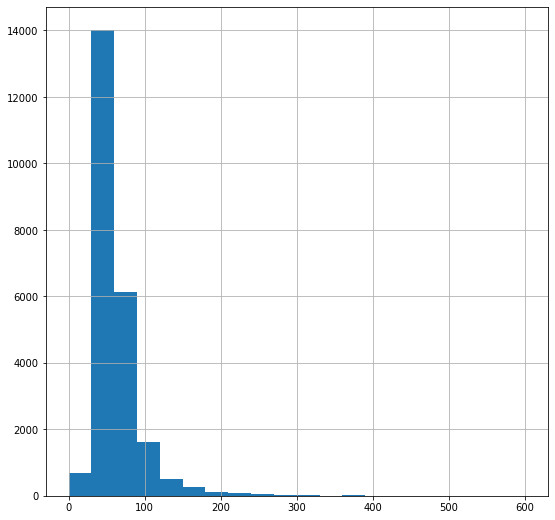

In [49]:
df['total_area'].hist(figsize=(9, 9), bins=20, range=(0, 600))
plt.show()



<div class="alert alert-info">
    <b></b> 
    Средняя площадь квартиры в 50-60 кв.м. Есть и с площадью больше 200 - это уже похоже на загородный дом
</div>

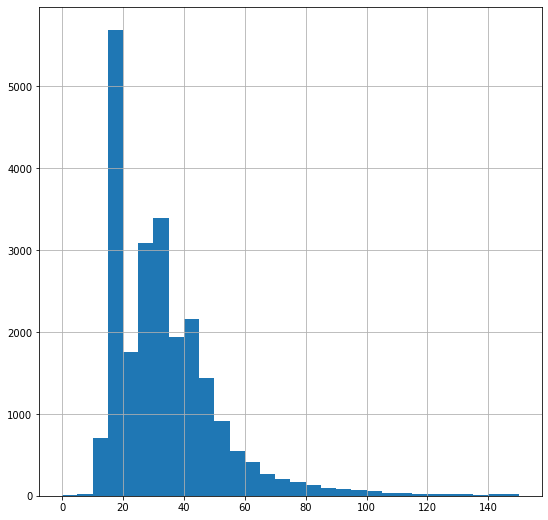

In [50]:
df['living_area'].hist(figsize=(9, 9), range=(0, 150), bins=30)
plt.show()



<div class="alert alert-info">
    <b></b> 
    Пик на 18 и 30 кв.м - это однушки и двушки малогабаритки.
</div>

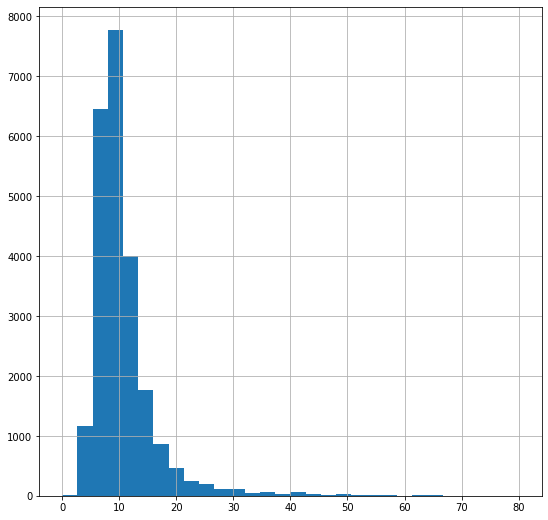

In [51]:
df['kitchen_area'].hist(figsize=(9, 9),range=(0, 80), bins=30)
plt.show()

<div class="alert alert-info">
    <b></b> 
    Средняя площадь кухни 10 кв.м
</div>

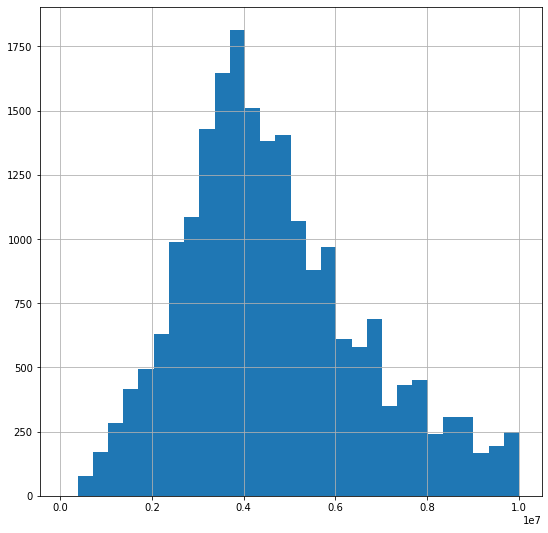

In [52]:
df['last_price'].hist(figsize=(9, 9), range=(50000, 10000000), bins=30)
plt.show()

<div class="alert alert-info">
    <b></b> 
    Пик цены 4 млн.р, продажа однущек в Питере и большое кол-во квартир за городом.
</div>

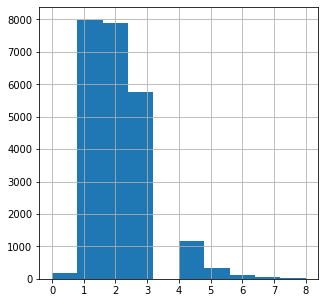

In [53]:
df['rooms'].hist(figsize=(5, 5), range=(0, 8))
plt.show()

<div class="alert alert-info">
    <b></b> 
    Предыдущие выводы подтвердились, это однушки и двушки
</div>

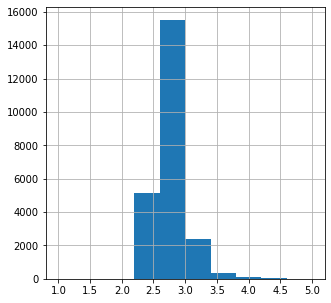

In [54]:
df['ceiling_height'].hist(figsize=(5, 5), range=(1, 5))
plt.show()

<div class="alert alert-info">
    <b></b> 
    Данные с таблицей описания сходятся, средняя высота потолков 2,7 м
</div>

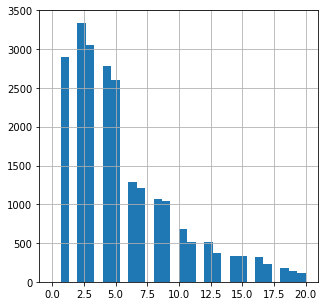

In [55]:
df['floor'].hist(figsize=(5, 5), range=(0, 20), bins=30)
plt.show()

<div class="alert alert-info">
    <b></b> 
    Резкий пик на 2-ом этаже, кто-бы сомневался, первый этаж неликвиден, а на второй через окно мало кто залезет, да и решетку на окна ставить не надо
</div>

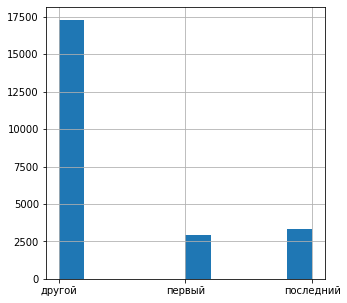

In [56]:
df['floor_category'].hist(figsize=(5, 5))
plt.show()

<div class="alert alert-info">
    <b></b> 
    Ставлю галочку при выборе квартиры - не перввый и не последний
</div>

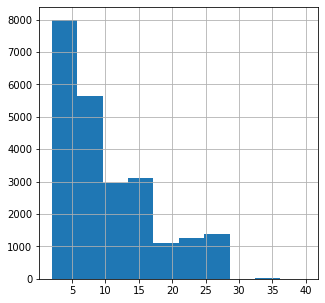

In [57]:
df['floors_total'].hist(figsize=(5, 5), range=(2, 40))
plt.show()

<div class="alert alert-info">
    <b></b> 
    Чаще продаются квартиры в 5-этажках, потом в 9 ажных домах, ну и после многоэтажные дома, современность
</div>

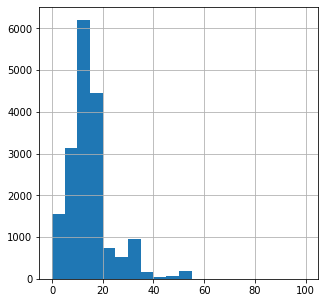

In [58]:
df['city_centers_distance'].hist(figsize=(5, 5), range=(0, 100),bins=20)
plt.show()

<div class="alert alert-info">
    <b></b> 
    Больше всего объявлений о продаже в чете города
</div>

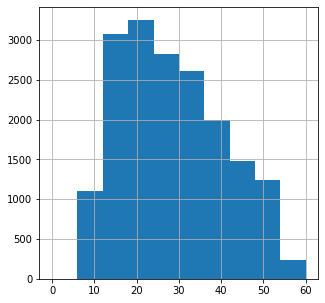

In [59]:
df['airports_distance'].hist(figsize=(5, 5), range=(0, 60))
plt.show()

<div class="alert alert-info">
    <b></b> 
    До аэропорта далековато, даже 10 км уже не на взлетной полосе, можно воспользоваться берушами иногда.
</div>

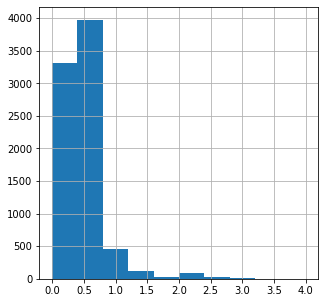

In [60]:
df['parks_distance'].hist(figsize=(5, 5), range=(0, 4))
plt.show()

<div class="alert alert-info">
    <b></b> 
    До парка можно сказать, рукой подать, очень редки объявления, где до парка еще на транспорте добираться
</div>

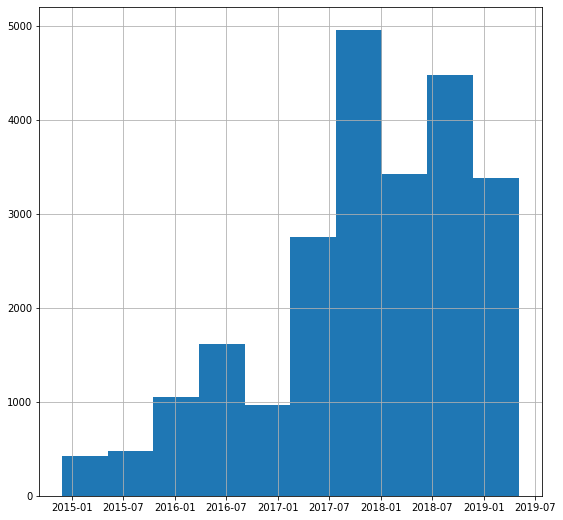

In [61]:
df['first_day_exposition'].hist(figsize=(9, 9))
plt.show()

<div class="alert alert-info">
    <b></b> 
    Что-то явно произошло с рынком недвижимости между 2017 и 2018 годами, раз так резко количество объявлений о продаже выросло
</div>

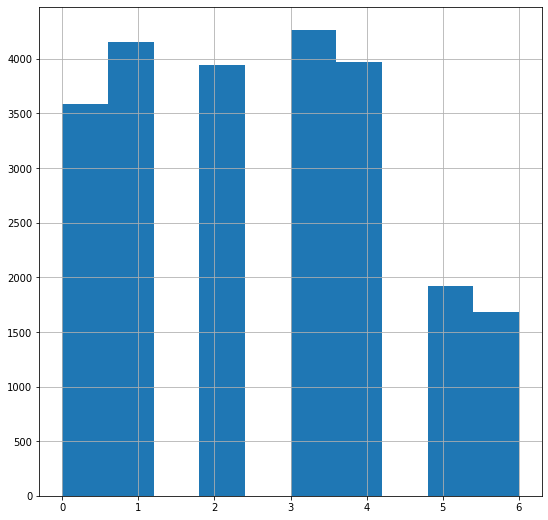

In [62]:
df['weekday'].hist(figsize=(9, 9))
plt.show()

<div class="alert alert-info">
    <b></b> 
    Квартиры выставляются на продажу по будням, только в рабочие часы и по предварительной встрече, в выходные мало кто хочет работать, но приходится
</div>

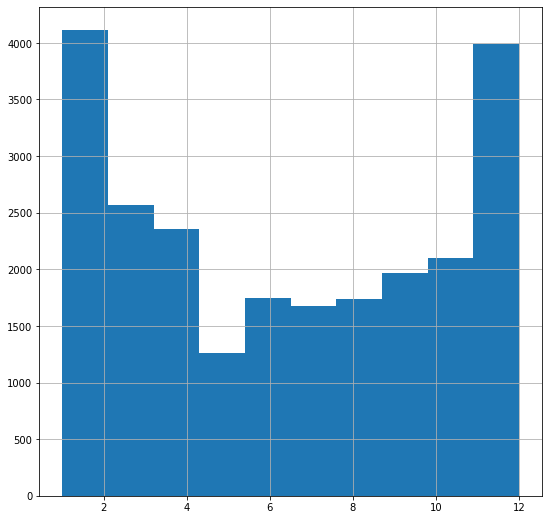

In [63]:
df['month'].hist(figsize=(9, 9))
plt.show()

<div class="alert alert-info">
    <b></b> 
    Интересное начало и завершение года, начал с большого количества объявлений и ими же закончил год
</div>

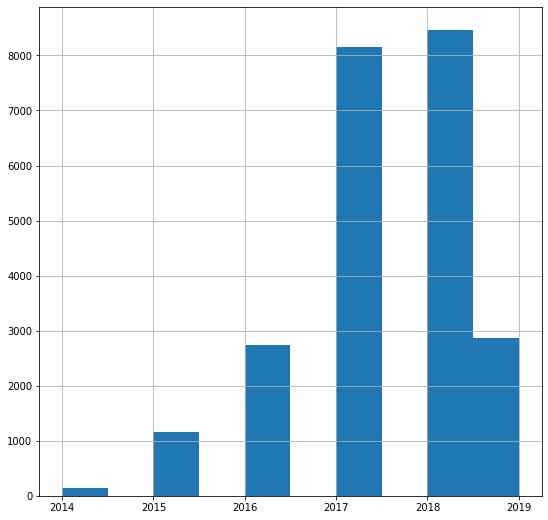

In [64]:
df['year'].hist(figsize=(9, 9))
plt.show()

<div class="alert alert-info">
    <b></b> 
    И все таки интересно, что же было между 17 и 18 годами, может курс резко начал расти
</div>

Максимальное значение квартиры 900 кв.м, минимальное 12 кв.м, средняя площадь квартиры 60 кв.м Средняя жилая площадь 34 кв.м Средняя площадь кухни 10кв.м В основном продаются 2-ые квартиры. Среднее расстояние до центра города 14 т.м, минимальное 181 метр, значит квартира находится в прямо в центре города. Расстояние в 60 т.м до центра свидетельствует о пригороде.

В целом данные похожи на правду, не считая очень большой квартиры в 900 кв.м, возможно кто- то в свое время выкупил весь этаж или даже 2, почему бы и нет, на кухне в 112 кв.м можно устраивать настоящий королевский прием)

Количество объявлений о продаже квартир резко выросли на переходе 17 в 18 год.

Расстояние до парков в пределах 1 км.
До аэропорта почти 20 км, ночью можно спать спокойно.

Средняя цена за квартиру до 10 млн руб. Максимальная 763 млн, может кто то перепуал загородный дом с квартирой?




In [65]:
df['days_exposition'].describe()

count    20353.000000
mean       180.775856
std        219.800661
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

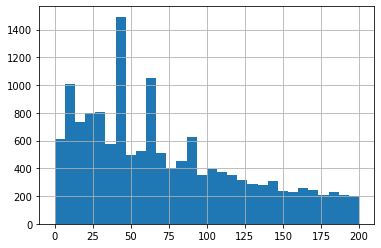

In [66]:
df['days_exposition'].hist(range=(0, 200), bins=30)
plt.show()

<div class="alert alert-info">
    <b></b> 
    Исправил, аномалии в продажах менее 50 дней, оснвная масса от 50 до 200 дней
</div>

In [67]:
df['days_exposition'].mean()

180.7758561391441

In [68]:
df['days_exposition'].median()

95.0

(0.0, 1500.0)

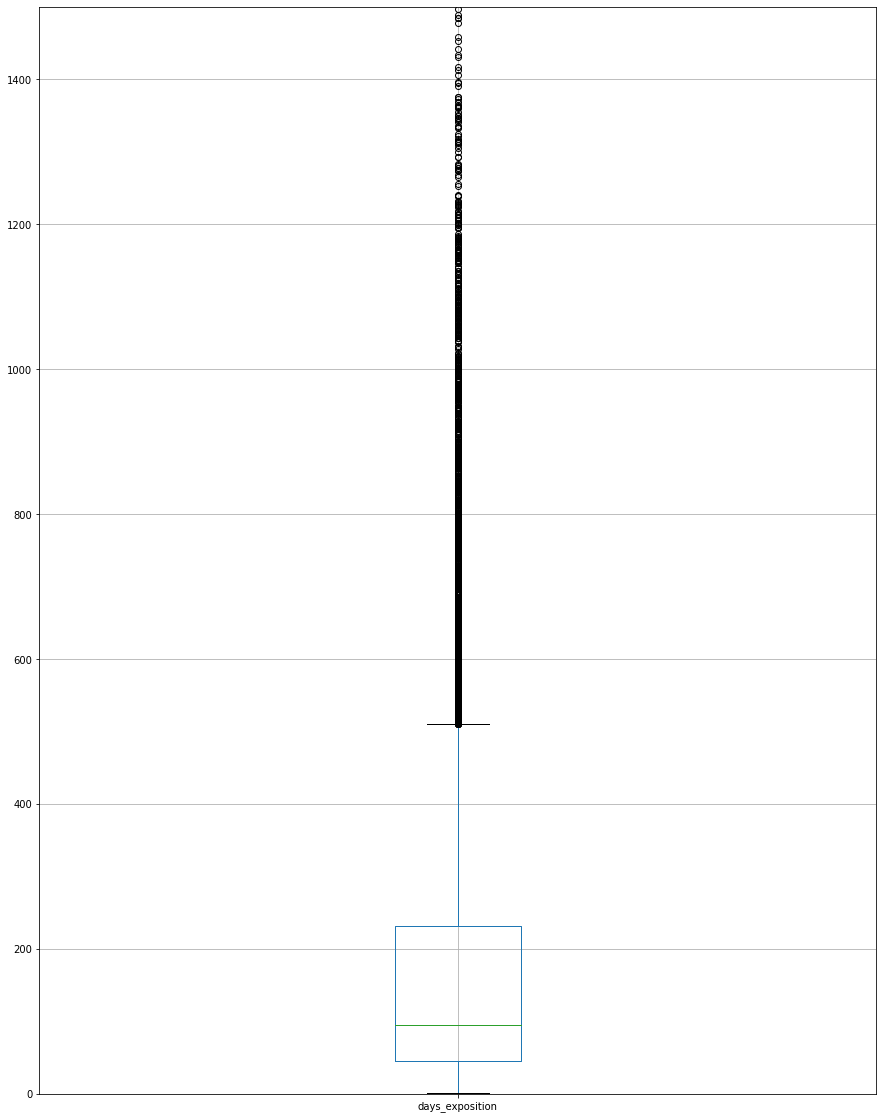

In [69]:
df.boxplot(column='days_exposition', figsize=(15, 20))
plt.ylim(0,1500)

Исходя из диаграммы размаха видно, что быстрые продажи до 50 дней, очень долгие продажи свыше 500 дней, т.к. основная масса значений лежит в диапозоне от 50 до 250 дней.

              kitchen_area  last_price  living_area  total_area
kitchen_area      1.000000    0.637990     0.560291    0.697857
last_price        0.637990    1.000000     0.626609    0.719987
living_area       0.560291    0.626609     1.000000    0.953752
total_area        0.697857    0.719987     0.953752    1.000000


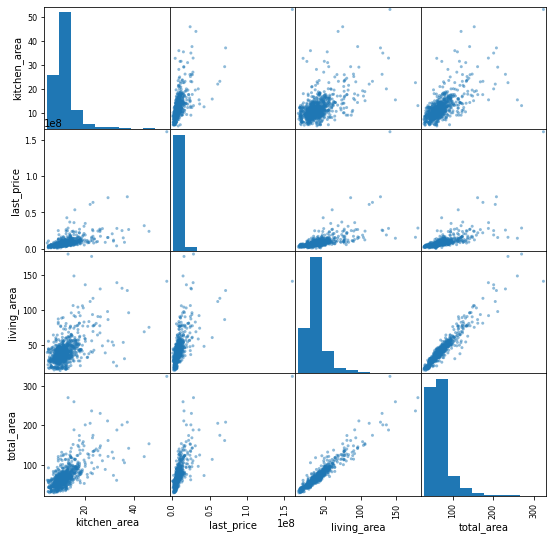

In [70]:
full_price_area = df.pivot_table(
    index='days_exposition',
    values=['total_area','living_area','kitchen_area', 'last_price'],
    aggfunc='mean'
)

print(full_price_area.corr())
pd.plotting.scatter_matrix(full_price_area, figsize=(9, 9))
plt.show()


Зависимость стоимости от площади прямая, не спроста, ведь, итоговая стоимость складывается из цены за 1кв.м

               floor  price_kv_m     rooms
floor       1.000000    0.046954 -0.128649
price_kv_m  0.046954    1.000000  0.056481
rooms      -0.128649    0.056481  1.000000


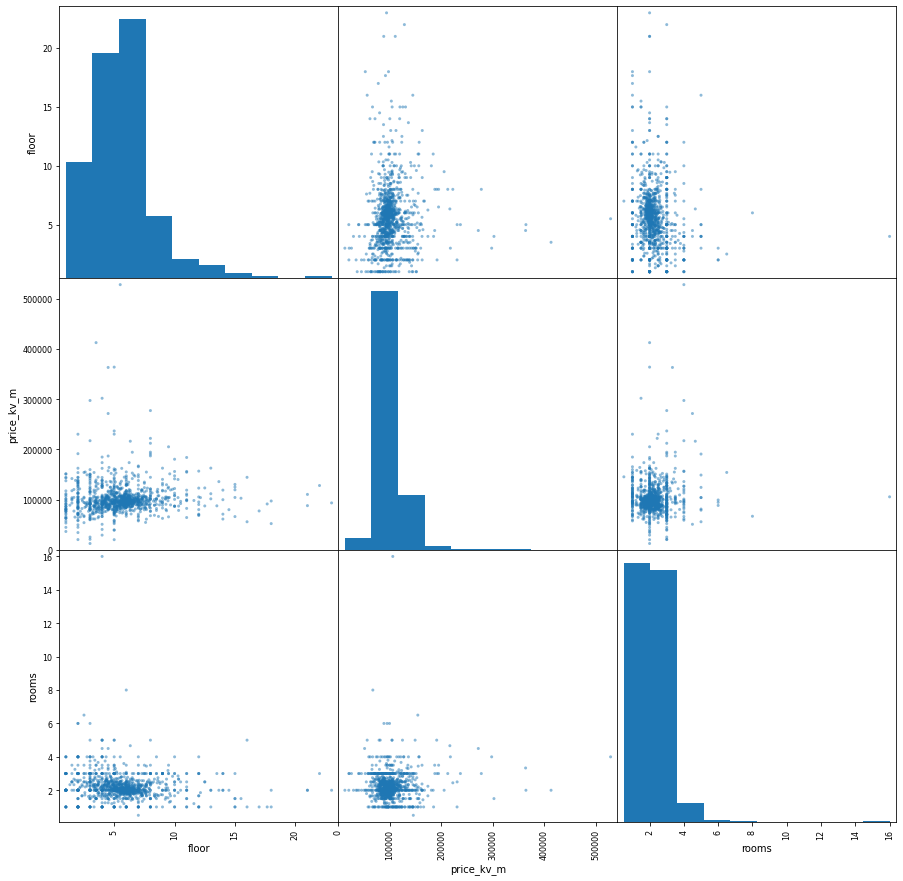

In [71]:
full_price_area1 = df.pivot_table(
    index='days_exposition',
    values=['rooms','floor','price_kv_m'],
    aggfunc='mean'
)

print(full_price_area1.corr())
pd.plotting.scatter_matrix(full_price_area1, figsize=(15, 15))
plt.show()

Количество комнат в квартире больше влияет на итоговую цену квартиры, естественно, но не сильно, т.к. комнат может быть много, а площадь небольшая.

(0.0, 150000.0)

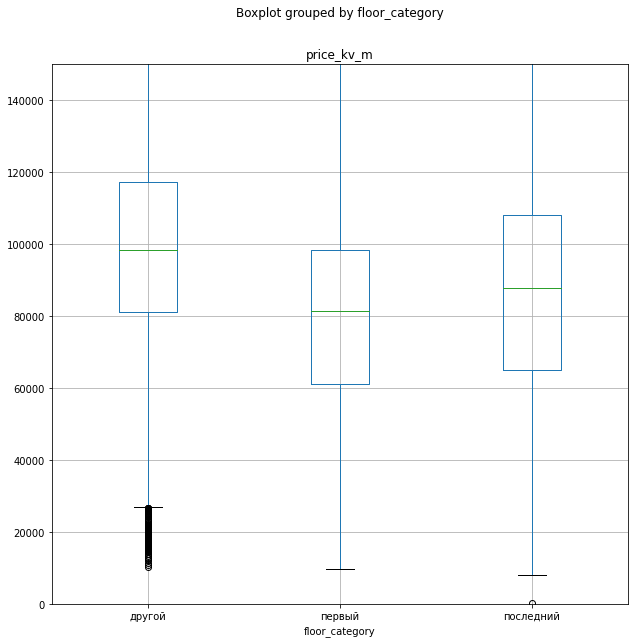

In [72]:
df.boxplot('price_kv_m', by='floor_category',figsize=(10,10)).set_ylim(0,150000)

С помощью диаграммы размаха получаем, квартиры на 1-ом этаже стоят дешевле.

            month   weekday      year
month    1.000000  0.006642 -0.284833
weekday  0.006642  1.000000 -0.001811
year    -0.284833 -0.001811  1.000000


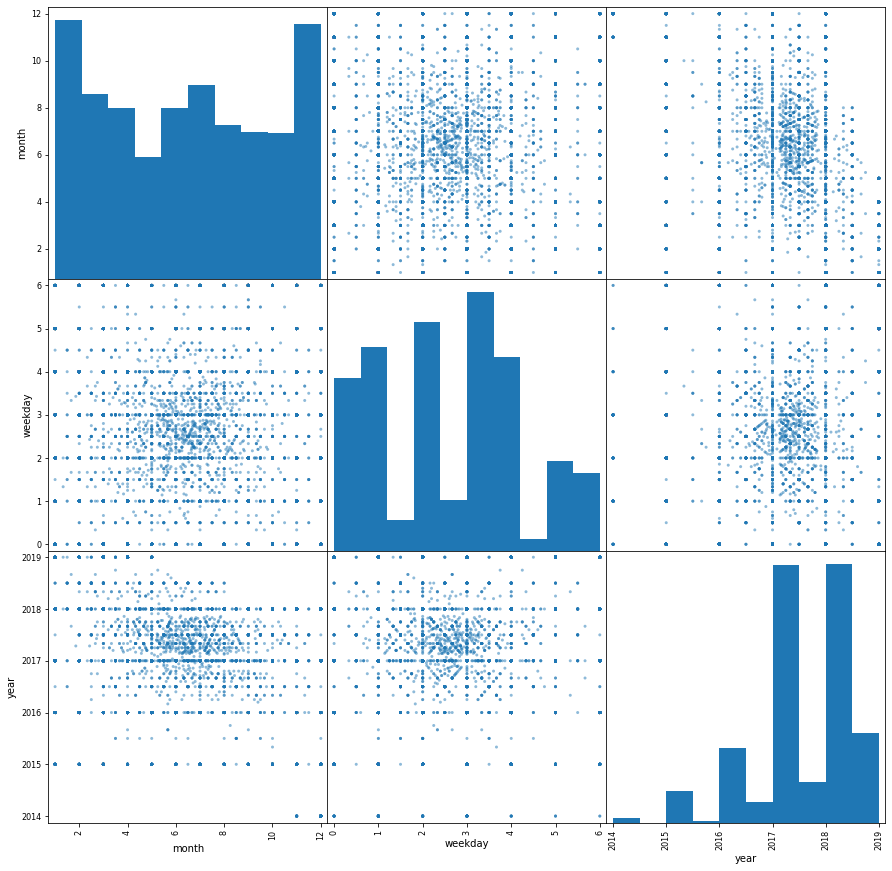

In [73]:
full_price_area2 = df.pivot_table(
    index='price_kv_m',
    values=['weekday','month','year'],
    aggfunc='mean'
)

print(full_price_area2.corr())
pd.plotting.scatter_matrix(full_price_area2, figsize=(15, 15))
plt.show()

День, месяц и год на стоимость квартиры никак не влияют.

In [74]:
df['locality_name'].value_counts().head(10)

санкт-петербург      15622
поселок мурино         550
поселок шушары         439
всеволожск             397
пушкин                 369
колпино                338
поселок парголово      327
гатчина                306
деревня кудрово        299
выборг                 235
Name: locality_name, dtype: int64

In [75]:
price_kv_m_med = df.pivot_table(index='locality_name', values='price_kv_m', aggfunc=['count', 'median', 'mean'])
price_kv_m_med.columns = ['count', 'median', 'mean']
price_kv_m_med.sort_values(by='count', ascending=False).head(10)


,count,median,mean
locality_name,,,
санкт-петербург,15622,104772.401062,114776.767054
поселок мурино,550,86059.293995,85603.644853
поселок шушары,439,76829.268293,78551.344545
всеволожск,397,65789.473684,68719.320400
пушкин,369,100000.000000,103125.819291
колпино,338,74723.748474,75424.579098
поселок парголово,327,91642.857143,90175.913458
гатчина,306,67860.569236,68757.678644
деревня кудрово,299,91860.465116,92473.547576


In [76]:
price_kv_m_med.sort_values(by='count', ascending=False).tail(10)

,count,median,mean
locality_name,,,
деревня иссад,1,34848.484848,34848.484848
поселок городского типа большая ижора,1,51578.947368,51578.947368
поселок гончарово,1,41371.158392,41371.158392
поселок высокоключевой,1,34931.506849,34931.506849
поселок володарское,1,16927.966102,16927.966102
поселок белоостров,1,66666.666667,66666.666667
поселок алексеевка,1,22222.222222,22222.222222
деревня каськово,1,37000.000000,37000.000000
деревня кисельня,1,20909.090909,20909.090909


Считаем среднюю стоимость квадратного метра, находим среднее и медиану, методом head и tail выводим самые высокие и низкие стоимости квадратного метра. Больше всего предложений и стоиомсть квадратного метра в Санкт петербурге, загором цена на квартиры соответственно ниже.


    
    
    <div class="alert alert-info">
    <b></b> 
    for locality_name in df['locality_name'].unique():
    median= df.loc[df['locality_name']== locality_name, 'city_centers_distance'].median
    df.loc[(df['city_centers_distance'].isna()) & (df['locality_name']==locality_name), 'city_centers_distance']=median
    
    Попробовал заполнить пропуски предлдоженным тобой кодом, пропуски вроде все заполнились, но в int не могу перевести(
</div>


In [77]:
df['city_centers_distance'] = df['city_centers_distance'].fillna(99999)

In [78]:
df['city_centers_distance'].value_counts()

99999.0    5481
12.0       1596
15.0       1560
13.0       1449
14.0       1273
           ... 
57.0          1
59.0          1
61.0          1
45.0          1
62.0          1
Name: city_centers_distance, Length: 62, dtype: int64

In [79]:
df['city_centers_distance'] = df['city_centers_distance'].astype(int)

,price_kv_m
city_centers_distance,
0,245833.530289
1,177327.462388
2,157849.007329
3,121345.670358
4,133469.068203
5,140060.580628
6,150041.352328
7,155997.405895
8,124886.787720


Text(0.5, 0, 'Расстояние до центра')

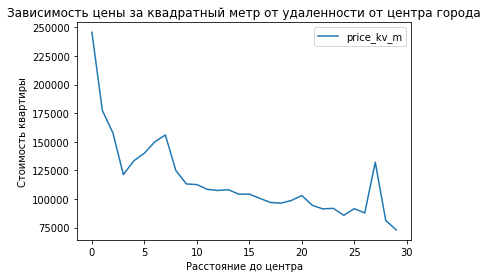

In [80]:
price_kv_m_km = df.query(
    'locality_name == "санкт-петербург" and city_centers_distance != 99999').pivot_table(
    index='city_centers_distance',
    values='price_kv_m',
    aggfunc='mean'
)
display(price_kv_m_km)
price_kv_m_km.plot()
plt.title('Зависимость цены за квадратный метр от удаленности от центра города')
plt.ylabel('Стоимость квартиры')
plt.xlabel('Расстояние до центра')


Чем дальше от центра тем квартиры дешевле.

### Общий вывод



<div class="alert alert-info">
    <b></b> 
    Мы просмотрели данные по таблице, удалили пропуски где это было нужно для вычислений и анализа. Изменили типы данных, названия столбцов, отсортировали столбцы для удобства восприятия. Добавили в табилцу новые столбцы.
Посмотрели зависимость цены квадратного метра от разных параметров, этажа, площади, комнат, расстояние до центра, этажа и т.д. 
Основываясь на этом исследовании можно сделать вывод, что чаще покупаются квартиры 2=х комнатные, со средней площадью 60 кв.м, ценой около 10 млн.руб, первый и последний этаж не привлекательны для покупки, покупают чаще начиная со 2-го этажа. Средняя врем продажи квартиры примерно 6 месяцев.
</div>
